# Advertising media - Sales prediction

## Scikit-Learn


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Read the CSV file into a Pandas DataFrame
df_AdvData = pd.read_csv('data/Advertising.csv')
print(df_AdvData.head())

# Take the features into 'X' and output into 'y'
X = df_AdvData[['TV', 'Radio', 'Newspaper']]
y = df_AdvData['Sales']

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [7]:
# Split it into 80% training and 20% testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

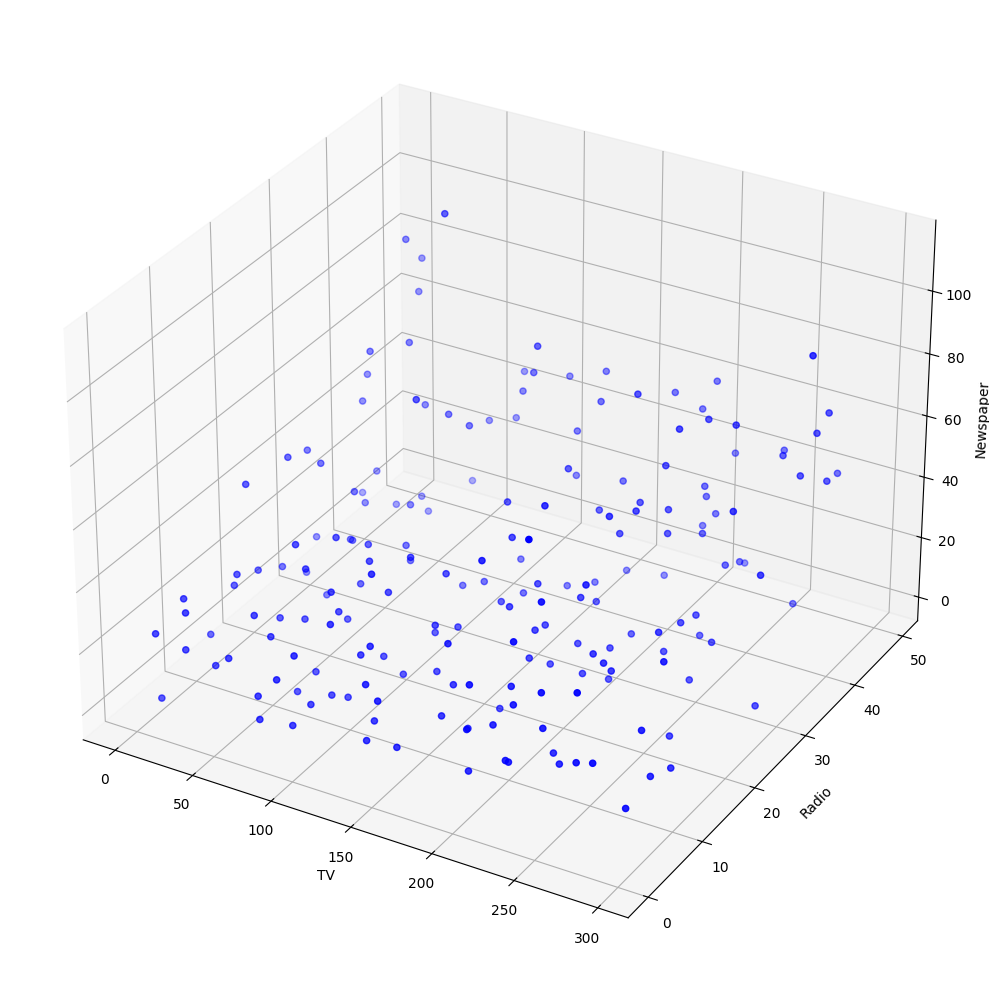

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], color="b");
ax.set_xlabel("TV")
ax.set_ylabel("Radio")
ax.set_zlabel("Newspaper")

plt.tight_layout()
plt.show()

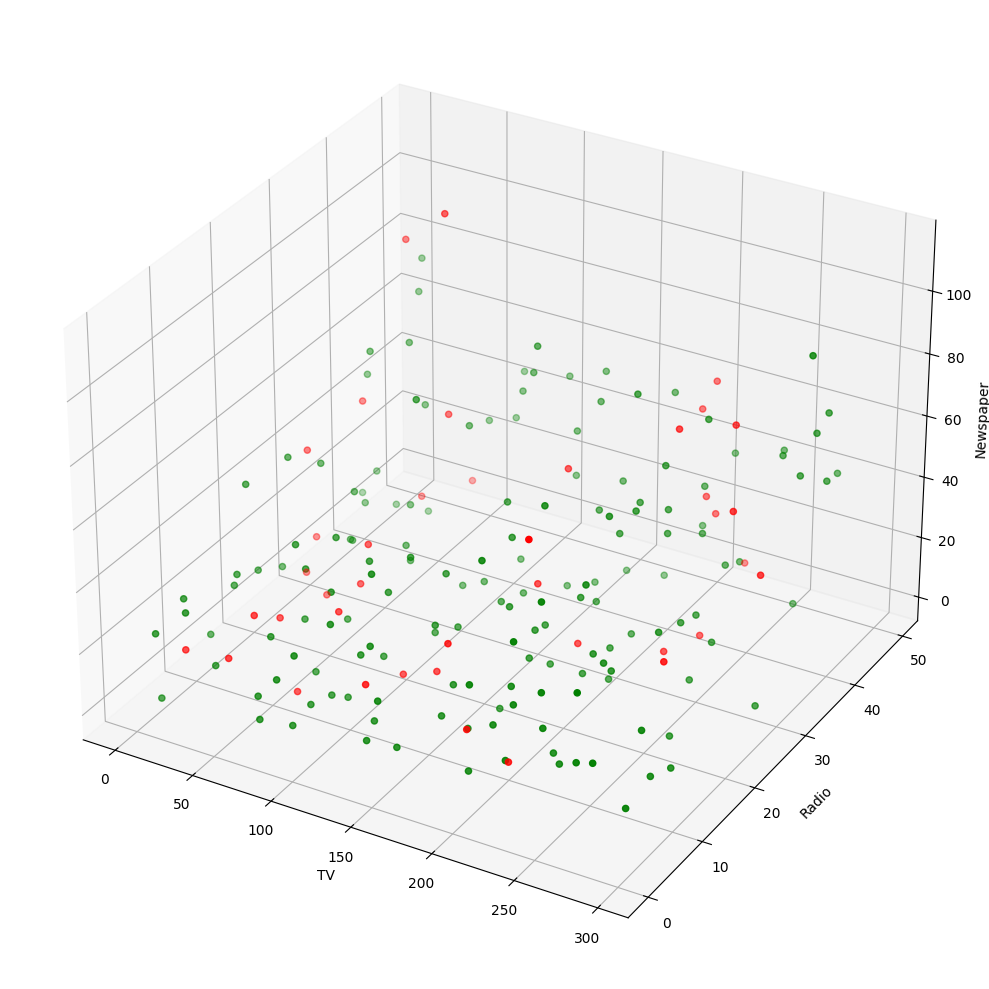

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train.iloc[:,0], X_train.iloc[:,1], X_train.iloc[:,2], color="g");
ax.scatter(X_test.iloc[:,0], X_test.iloc[:,1], X_test.iloc[:,2], color="r");
ax.set_xlabel("TV")
ax.set_ylabel("Radio")
ax.set_zlabel("Newspaper")

plt.tight_layout()
plt.show()

In [10]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [11]:
X_train = X_train.values
y_train = y_train.values

In [12]:
print(type(X_train))

<class 'numpy.ndarray'>


In [13]:
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)

# Combine the operations
X_test = (X_test.values).astype(np.float32)
y_test = (y_test.values).astype(np.float32)

In [14]:
print(X_train.shape)

(160, 3)


In [15]:
X.describe()

,TV,Radio,Newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


$$ TV' = \frac{TV - \mu}{\sigma}$$

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)

X_test_std = sc.transform(X_test)


In [17]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression()

linearRegression.fit(X_train_std, y_train)

r2_Score = linearRegression.score(X_test_std, y_test)

print(r2_Score)

0.8994380039166184


In [18]:
# Print parameters

print(linearRegression.intercept_)
print(linearRegression.coef_)

14.1
[3.7641962  2.792307   0.05597566]


$$ \hat y = 14.1 + 3.8x_1 + 2.8x_2 + 0.05x_3 $$

# Parameter Estimation
## Normal Equation

$ \hat \theta = (X^T \cdot X)^{-1} \cdot X^T \cdot y $

### Introduce an additional column for bias to associate with.

In [19]:
print(X_train_std[:3, :])

[[-0.4042484  -1.0282371  -0.33767536]
 [ 0.32060772 -0.9198277  -1.1614393 ]
 [-1.2705109   0.25912377  0.25425074]]


In [20]:
# Create a new design matrix with first column as 1
X_train_std_bias = np.c_[np.ones((X_train_std.shape[0], 1)), X_train_std]

In [21]:
# Print first three entries
print(X_train_std_bias[:3, :])

[[ 1.         -0.40424839 -1.0282371  -0.33767536]
 [ 1.          0.32060772 -0.9198277  -1.1614393 ]
 [ 1.         -1.27051091  0.25912377  0.25425074]]


In [22]:
# Implement the normal equation analytical solution

inverseTerm = np.linalg.inv(np.dot(X_train_std_bias.T, X_train_std_bias))

theta_NormalEquation = inverseTerm.dot(X_train_std_bias.T).dot(y_train)

In [23]:
# The best parameters estimated using closed-form slution
print(theta_NormalEquation)

# 14.1
# [3.7641964  2.7923067  0.05597585]


[14.10000006  3.76419617  2.7923068   0.05597551]


## Full-batch gradient descent

In [24]:
np.random.seed(42)

# learning-rate
eta = 0.1

# epochs
n_iteration = 100

# Total number of samples
m = X_train_std.shape[0]

# Randomly initialize the model paramters
theta_FullBatchGD = np.random.randn(4,1)

print(theta_FullBatchGD)

[[ 0.49671415]
 [-0.1382643 ]
 [ 0.64768854]
 [ 1.52302986]]


In [25]:
print(X_train_std_bias.T.shape)
print(X_train_std_bias.shape)
print(theta_FullBatchGD.shape)

(4, 160)
(160, 4)
(4, 1)


$$\frac{2}{m}X^T(X\theta - y)$$

In [ ]:
# Train using full-batch gradient descent

for itr in range(n_iteration):

  nabla_MSE = 2/m * X_train_std_bias.T.dot(X_train_std_bias.dot(theta_FullBatchGD) - y_train.reshape(-1,1))

  theta_FullBatchGD = theta_FullBatchGD - eta * nabla_MSE

In [ ]:
print(theta_FullBatchGD)
#[14.10000008  3.76419614  2.79230675  0.05597549]

[[14.10000006]
 [ 3.7641965 ]
 [ 2.79230318]
 [ 0.05597909]]


## Stochastic Gradient Descent

In [ ]:
n_epoch = 50
m = X_train_std.shape[0]

t0, t1 = 5, 50

# Learning-rate scheduler
def lr_simulatedAnnealing(t):
  return t0/(t + t1)

np.random.seed(42)

theta_StochasticGD = np.random.randn(4,1)

print(theta_StochasticGD)

[[ 0.49671415]
 [-0.1382643 ]
 [ 0.64768854]
 [ 1.52302986]]


$$2X^T(X\theta - y)$$

In [ ]:
t = 0

for epoch in range(n_epoch):

  for i in range(m):
    t += 1

    random_index = np.random.randint(m)

    X_i = X_train_std_bias[random_index:random_index+1]
    y_i = y_train[random_index:random_index+1]

    nabla_MSE = 2 * X_i.T.dot(X_i.dot(theta_StochasticGD) - y_i)

    eta = lr_simulatedAnnealing(t)

    theta_StochasticGD = theta_StochasticGD - eta * nabla_MSE


print(theta_StochasticGD)


[[14.16030491]
 [ 3.64102602]
 [ 2.83581781]
 [ 0.03565008]]


In [ ]:
tX_i = X_train_std_bias[random_index:random_index+1]
print(tX_i.shape)
print(tX_i)

(1, 4)
[[ 1.         -0.47792223 -0.58104855  0.08653841]]


In [ ]:
tX_i = X_train_std_bias[random_index]
print(tX_i.shape)
print(tX_i)

(4,)
[ 1.         -0.47792223 -0.58104855  0.08653841]


## Mini-batch Gradient Descent

In [ ]:
n_epoch = 50
m = X_train_std.shape[0]

t0, t1 = 5, 50

def lr_simulatedAnnealing(t):
  return t0/(t + t1)

np.random.seed(42)
theta_MiniBatchGD = np.random.randn(4,1)
print(theta_MiniBatchGD)

[[ 0.49671415]
 [-0.1382643 ]
 [ 0.64768854]
 [ 1.52302986]]


$$\frac{2}{k}X^T(X\theta - y)$$

In [ ]:
t = 0
batch_size = 16
for epoch in range(n_epoch):

  shuffled_index = np.random.permutation(m)
  X_train_std_bias_shuffled = X_train_std_bias[shuffled_index]
  y_train_shuffled = y_train[shuffled_index]

  for i in range(0, m, batch_size):
    t += 1

    X_i = X_train_std_bias_shuffled[i : i+batch_size]
    y_i = y_train_shuffled[i : i+batch_size]

    nabla_MSE = 2/batch_size * X_i.T.dot(X_i.dot(theta_MiniBatchGD) - y_i.reshape(-1,1))

    eta = lr_simulatedAnnealing(t)

    theta_MiniBatchGD = theta_MiniBatchGD - eta * nabla_MSE

print(theta_MiniBatchGD)
#[14.10000008  3.76419614  2.79230675  0.05597549]

[[14.09665445]
 [ 3.76386355]
 [ 2.79280097]
 [ 0.05852738]]


### Compare the model parameters estimated

In [ ]:
thetaC = np.c_[theta_NormalEquation, theta_FullBatchGD, theta_StochasticGD, theta_MiniBatchGD]

In [ ]:
thetaC

array([[14.10000006, 14.10000006, 14.16030491, 14.09665445],
       [ 3.76419617,  3.7641965 ,  3.64102602,  3.76386355],
       [ 2.7923068 ,  2.79230318,  2.83581781,  2.79280097],
       [ 0.05597551,  0.05597909,  0.03565008,  0.05852738]])

In [ ]:
# Print parameters

print(linearRegression.intercept_)
print(linearRegression.coef_)

14.1
[3.7641964  2.7923071  0.05597591]
